This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 35ms/step - loss: 0.6434 - accuracy: 0.8080 - val_loss: 0.3298 - val_accuracy: 0.9064
Epoch 2/10
375/375 [==============================] - 14s 37ms/step - loss: 0.2495 - accuracy: 0.9224 - val_loss: 0.2407 - val_accuracy: 0.9283
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1619 - accuracy: 0.9500 - val_loss: 0.1575 - val_accuracy: 0.9521
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1153 - accuracy: 0.9639 - val_loss: 0.1417 - val_accuracy: 0.9574
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.1180 - val_accuracy: 0.9668
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0625 - accuracy: 0.9795 - val_loss: 0.1268 - val_accuracy: 0.9658
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.1321 - val_accuracy: 0.96

**Plotting a validation accuracy comparison**

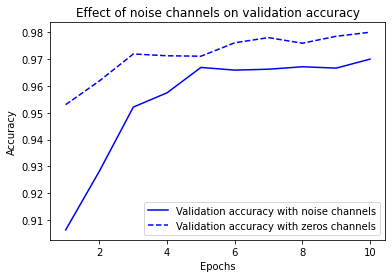

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 14ms/step - loss: 2.3178 - accuracy: 0.1029 - val_loss: 2.3071 - val_accuracy: 0.1067
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.3000 - accuracy: 0.1150 - val_loss: 2.3131 - val_accuracy: 0.0975
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2910 - accuracy: 0.1238 - val_loss: 2.3187 - val_accuracy: 0.0963
Epoch 4/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2770 - accuracy: 0.1408 - val_loss: 2.3299 - val_accuracy: 0.0990
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2598 - accuracy: 0.1535 - val_loss: 2.3375 - val_accuracy: 0.0960
Epoch 6/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2385 - accuracy: 0.1702 - val_loss: 2.3572 - val_accuracy: 0.0994
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2147 - accuracy: 0.1807 - val_loss: 2.3648 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 533.5582 - accuracy: 0.3579 - val_loss: 2.1911 - val_accuracy: 0.2702
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 3.3771 - accuracy: 0.2283 - val_loss: 2.9998 - val_accuracy: 0.2482
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 3.5426 - accuracy: 0.2201 - val_loss: 6.0076 - val_accuracy: 0.1790
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.8252 - accuracy: 0.2229 - val_loss: 2.6488 - val_accuracy: 0.2027
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 2.9296 - accuracy: 0.2471 - val_loss: 2.8500 - val_accuracy: 0.2692
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 2.5593 - accuracy: 0.2521 - val_loss: 2.5173 - val_accuracy: 0.2713
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.8312 - accuracy: 0.2643 - val_loss: 2.2374 - val_accuracy: 0.18

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.3675 - accuracy: 0.9147 - val_loss: 0.1799 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1379 - accuracy: 0.9634 - val_loss: 0.1655 - val_accuracy: 0.9628
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1198 - accuracy: 0.9719 - val_loss: 0.1643 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1023 - accuracy: 0.9776 - val_loss: 0.2602 - val_accuracy: 0.9587
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0896 - accuracy: 0.9814 - val_loss: 0.2174 - val_accuracy: 0.9669
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0785 - accuracy: 0.9846 - val_loss: 0.2395 - val_accuracy: 0.9727
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0754 - accuracy: 0.9867 - val_loss: 0.2186 - val_accuracy: 0.9743

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6824 - accuracy: 0.8282 - val_loss: 0.3602 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.9035 - val_loss: 0.3084 - val_accuracy: 0.9132
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.9121 - val_loss: 0.2899 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9162 - val_loss: 0.2807 - val_accuracy: 0.9228
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2894 - accuracy: 0.9192 - val_loss: 0.2766 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9210 - val_loss: 0.2707 - val_accuracy: 0.9253
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.9220 - val_loss: 0.2693 - val_accuracy: 0.9264
Epoch 

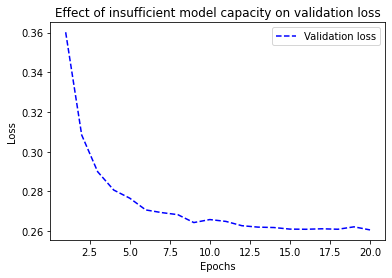

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3611 - accuracy: 0.8981 - val_loss: 0.1885 - val_accuracy: 0.9448
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1585 - accuracy: 0.9527 - val_loss: 0.1402 - val_accuracy: 0.9582
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1095 - accuracy: 0.9681 - val_loss: 0.1296 - val_accuracy: 0.9620
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.1022 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0943 - val_accuracy: 0.9729
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0892 - val_accuracy: 0.9749
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5786 - accuracy: 0.7227 - val_loss: 0.4780 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3604 - accuracy: 0.8943 - val_loss: 0.3308 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2540 - accuracy: 0.9221 - val_loss: 0.2890 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1942 - accuracy: 0.9406 - val_loss: 0.2819 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1574 - accuracy: 0.9507 - val_loss: 0.2780 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1285 - accuracy: 0.9607 - val_loss: 0.2927 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1069 - accurac

**Version of the model with lower capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6133 - accuracy: 0.6644 - val_loss: 0.5535 - val_accuracy: 0.7781
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5156 - accuracy: 0.8069 - val_loss: 0.5077 - val_accuracy: 0.8352
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4669 - accuracy: 0.8655 - val_loss: 0.4867 - val_accuracy: 0.8182
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4340 - accuracy: 0.8976 - val_loss: 0.4725 - val_accuracy: 0.8420
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4076 - accuracy: 0.9183 - val_loss: 0.4543 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3874 - accuracy: 0.9362 - val_loss: 0.4589 - val_accuracy: 0.8586
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3690 - accuracy: 0.9464 - val_loss: 0.4610 - val_accuracy: 0.8590
Epoch 8/20
30

**Version of the model with higher capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 11s 328ms/step - loss: 0.5464 - accuracy: 0.7491 - val_loss: 0.3174 - val_accuracy: 0.8830
Epoch 2/20
30/30 [==============================] - 9s 316ms/step - loss: 0.2479 - accuracy: 0.9062 - val_loss: 0.4134 - val_accuracy: 0.8154
Epoch 3/20
30/30 [==============================] - 9s 313ms/step - loss: 0.1550 - accuracy: 0.9409 - val_loss: 0.2872 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 9s 316ms/step - loss: 0.0832 - accuracy: 0.9742 - val_loss: 0.3754 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 9s 314ms/step - loss: 0.1117 - accuracy: 0.9755 - val_loss: 0.3514 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 9s 309ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.4992 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 11s 357ms/step - loss: 8.3959e-04 - accuracy: 0.9999 - val_loss: 0.6337 - val_accuracy: 0.8859


#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5944 - accuracy: 0.7785 - val_loss: 0.4816 - val_accuracy: 0.8417
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3963 - accuracy: 0.8951 - val_loss: 0.4140 - val_accuracy: 0.8652
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3258 - accuracy: 0.9203 - val_loss: 0.3638 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2965 - accuracy: 0.9255 - val_loss: 0.3559 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2749 - accuracy: 0.9335 - val_loss: 0.3779 - val_accuracy: 0.8767
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2626 - accuracy: 0.9381 - val_loss: 0.3599 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2552 - accuracy: 0.9392 - val_loss: 0.4039 - val_accuracy: 0.8682
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.6449 - accuracy: 0.6135 - val_loss: 0.5549 - val_accuracy: 0.8449
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5313 - accuracy: 0.7485 - val_loss: 0.4415 - val_accuracy: 0.8681
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4516 - accuracy: 0.8107 - val_loss: 0.3682 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3956 - accuracy: 0.8451 - val_loss: 0.3264 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3446 - accuracy: 0.8747 - val_loss: 0.3017 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3140 - accuracy: 0.8924 - val_loss: 0.2928 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2781 - accuracy: 0.9058 - val_loss: 0.2746 - val_accuracy: 0.8915
Epoch 8/20
30

## Summary